In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train:', x_train.shape)
print('y_train:', y_train.shape)
print('x_test:', x_test.shape)
print('y_test:', y_test.shape)

K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

std=1e-5
w = std*np.random.randn(Din, K)
b = np.zeros(K)
batch_size = Ntr
print("w:", w.shape)
print("b:", b.shape)
print("batch size:", batch_size)

iterations = 300
lr = 1.4e-2
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    batch_indices = np.random.choice(Ntr,batch_size)
    x = x_train[batch_indices]
    y = y_train[batch_indices]

    y_pred = x.dot(w)+b
    loss = 1./batch_size*np.square(y_pred-y).sum()+reg*(np.sum(w*w))
    loss_history.append(loss)
    #if t%10 == 0:
    print('iteration %d / %d: loss %f' %(t,iterations,loss))

    dy_pred = 1./batch_size*2.0*(y_pred-y) #partial derivative of loss w.r.t. y_hat
    dw = x.T.dot(dy_pred)+reg*w #partial derivative of loss w.rt. w
    db = dy_pred.sum(axis=0)

    w -= lr*dw
    b -= lr*db 
    lr *= lr_decay

print('print w:', w)
print('print b:', b)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)
w: (3072, 10)
b: (10,)
batch size: 50000
iteration 0 / 300: loss 1.000012
iteration 1 / 300: loss 0.957365
iteration 2 / 300: loss 0.937673
iteration 3 / 300: loss 0.925056
iteration 4 / 300: loss 0.914547
iteration 5 / 300: loss 0.906417
iteration 6 / 300: loss 0.899309
iteration 7 / 300: loss 0.894451
iteration 8 / 300: loss 0.886643
iteration 9 / 300: loss 0.880955
iteration 10 / 300: loss 0.877259
iteration 11 / 300: loss 0.873096
iteration 12 / 300: loss 0.867001
iteration 13 / 300: loss 0.864321
iteration 14 / 300: loss 0.859605
iteration 15 / 300: loss 0.856978
iteration 16 / 300: loss 0.854859
iteration 17 / 300: loss 0.851368
iteration 18 / 300: loss 0.846876
iteration 19 / 300: loss 0.845593
iteration 20 / 300: loss 0.840961
iteration 21 / 300: loss 0.838550
iteration 22 / 300: loss 0.836585
iteration 23 / 300: loss 0.835723
iteration 24 / 300: loss 0.833630
iteration 25 / 300: loss 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

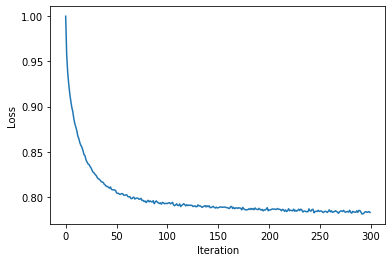

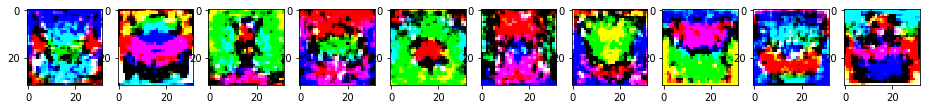

In [3]:
plt.plot(loss_history)
plt.xlabel("Iteration")
plt.ylabel("Loss")
f,axarr = plt.subplots(1,10)
f.set_size_inches(16,6)

#Matrix w
for i in range(10):
    img = w[:,i].reshape(32,32,3)
    axarr[i].imshow(img*1000)
plt.show()

In [6]:
#train accuracy,train loss
y_pred = x_train.dot(w)+b
train_acc = 1.0 -1/(9*Ntr)*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred, axis=1))).sum()
train_loss = 1./batch_size*np.square(y_pred-y_train).sum()+reg*(np.sum(w*w))

#test accuracy, test loss
y_pred = x_test.dot(w)+b
test_acc = 1.0 - 1/(9*Nte)*(np.abs(np.argmax(y_test,axis=1) - np.argmax(y_pred, axis=1))).sum()
test_loss = 1./batch_size*np.square(y_pred-y_test).sum()+reg*(np.sum(w*w))


print("train_acc = ", train_acc)
print("train_loss = ", train_loss)
print("test_acc = ", test_acc)
print("test_loss = ", test_loss)




train_acc =  0.7552622222222223
train_loss =  0.7829004182575694
test_acc =  0.7491777777777777
test_loss =  0.15751616796553053
